CALL price = 8.0214
PUT  price = 7.9004
--- Greeks (call) ---
Delta = 0.5422
Gamma = 0.019835
Vega  = 39.6705
Theta = -6.2771
Rho   = 46.2015


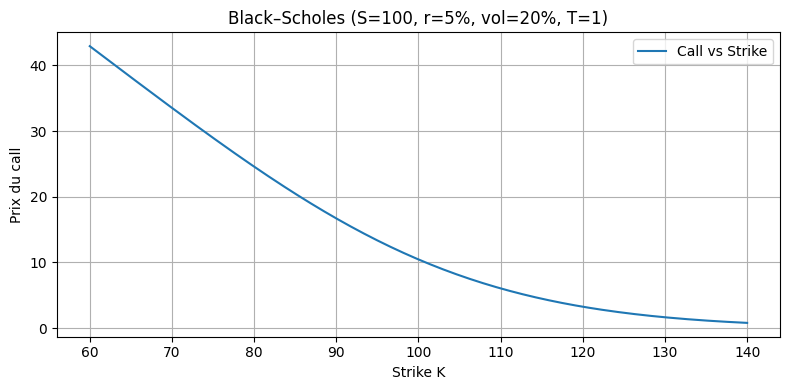

In [ ]:
# black_scholes.py
import math
import numpy as np
import matplotlib.pyplot as plt

# Normale standard: SciPy si dispo, sinon erf (fallback)
try:
    from scipy.stats import norm
    def N(x): return norm.cdf(x)
    def n(x): return norm.pdf(x)
except Exception:
    SQRT2 = math.sqrt(2.0)
    SQRT2PI = math.sqrt(2.0 * math.pi)
    def N(x):  # CDF via erf
        return 0.5 * (1.0 + math.erf(x / SQRT2))
    def n(x):  # PDF
        return math.exp(-0.5 * x * x) / SQRT2PI

# Black–Scholes core
def d1(S, K, r, sigma, T):
    return (math.log(S/K) + (r + 0.5*sigma*sigma)*T) / (sigma * math.sqrt(T))

def d2(S, K, r, sigma, T):
    return d1(S, K, r, sigma, T) - sigma * math.sqrt(T)

def bs_call(S, K, r, sigma, T):
    _d1, _d2 = d1(S,K,r,sigma,T), d2(S,K,r,sigma,T)
    return S * N(_d1) - K * math.exp(-r*T) * N(_d2)

def bs_put(S, K, r, sigma, T):
    _d1, _d2 = d1(S,K,r,sigma,T), d2(S,K,r,sigma,T)
    return K * math.exp(-r*T) * N(-_d2) - S * N(-_d1)

# Greeks 
def delta_call(S, K, r, sigma, T): return N(d1(S,K,r,sigma,T))
def delta_put(S, K, r, sigma, T): return N(d1(S,K,r,sigma,T)) - 1.0
def gamma(S, K, r, sigma, T): return n(d1(S,K,r,sigma,T)) / (S * sigma * math.sqrt(T))
def vega(S, K, r, sigma, T): return S * n(d1(S,K,r,sigma,T)) * math.sqrt(T)
def theta_call(S, K, r, sigma, T):
    _d1, _d2 = d1(S,K,r,sigma,T), d2(S,K,r,sigma,T)
    first = -(S * n(_d1) * sigma) / (2.0 * math.sqrt(T))
    return first - r * K * math.exp(-r*T) * N(_d2)
def theta_put(S, K, r, sigma, T):
    _d1, _d2 = d1(S,K,r,sigma,T), d2(S,K,r,sigma,T)
    first = -(S * n(_d1) * sigma) / (2.0 * math.sqrt(T))
    return first + r * K * math.exp(-r*T) * N(-_d2)
def rho_call(S, K, r, sigma, T): return K * T * math.exp(-r*T) * N(d2(S,K,r,sigma,T))
def rho_put(S, K, r, sigma, T): return -K * T * math.exp(-r*T) * N(-d2(S,K,r,sigma,T))


if __name__ == "__main__":
    S, K, r, sigma, T = 100, 105, 0.05, 0.20, 1.0
    print(f"CALL price = {bs_call(S,K,r,sigma,T):.4f}")
    print(f"PUT  price = {bs_put(S,K,r,sigma,T):.4f}")
    print("--- Greeks (call) ---")
    print(f"Delta = {delta_call(S,K,r,sigma,T):.4f}")
    print(f"Gamma = {gamma(S,K,r,sigma,T):.6f}")
    print(f"Vega  = {vega(S,K,r,sigma,T):.4f}")
    print(f"Theta = {theta_call(S,K,r,sigma,T):.4f}")
    print(f"Rho   = {rho_call(S,K,r,sigma,T):.4f}")

    # Petit graphe Call vs Strike
    Ks = np.linspace(60, 140, 200)
    prices = [bs_call(S, k, r, sigma, T) for k in Ks]
    plt.figure(figsize=(8,4))
    plt.plot(Ks, prices, label="Call vs Strike")
    plt.xlabel("Strike K")
    plt.ylabel("Prix du call")
    plt.title("Black–Scholes (S=100, r=5%, vol=20%, T=1)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
